# Setting Up Work Environment

In [1]:
!pip install --upgrade google-generativeai

In [2]:
!pip install -q -U google-genai

In [60]:
import os
from google import genai
import google.generativeai as ggenai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown

from PIL import Image
from google.genai import types

from IPython.display import HTML

In [4]:
# Set up the API key (Replace 'YOUR_API_KEY' with your actual Gemini API key)
key = userdata.get('genai_api')
client = genai.Client(api_key=key)

List the set of available models

In [5]:
ggenai.configure(api_key=key)

models = ggenai.list_models()
for model in models:
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thi

Create a helper function to make it easier to use prompts and look at generated outputs.

In [6]:
def get_completion(prompt, model="gemini-2.0-flash"):
  response = client.models.generate_content(
      model=model,
      contents=prompt,
      config=types.GenerateContentConfig(max_output_tokens=500, temperature=0.1)
      )
  return response.text  # Extract the generated text

# Generate text from text-only input

The simplest way to generate text using the Gemini API is to provide the model with a single text-only input

## Write clear and specific instructions
The fundamental principle is to craft clear and specific instructions. To achieve this, articulate your expectations for the model in a way that is as precise and detailed as possible.  

Providing clear and specific guidance helps steer the model toward the desired outcome while minimizing the likelihood of irrelevant or incorrect responses. Keep in mind that clarity does not necessarily mean brevity longer prompts often offer greater context and detail, leading to more accurate and relevant results. Now, let’s explore various strategies to effectively apply this principle.

### Utilize delimiters to clearly separate different sections of the input.

The first strategy for crafting clear and specific instructions is to use delimiters to separate distinct parts of the input.  

For example, when summarizing a paragraph, the prompt can specify that the text enclosed within triple backticks should be condensed into a single sentence. To generate the response, we simply use our `get_completion` helper function and print the output.

In [7]:
input_text = f"""
You should express what you want a model to do by providing instructions that are as clear and specific as you can possibly make them. \
This will guide the model towards the desired output, and reduce the chances of receiving irrelevant or incorrect responses. Don't confuse writing a \
clear prompt with writing a short prompt. In many cases, longer prompts provide more clarity and context for the model, which can lead to \
more detailed and relevant outputs.
"""

prompt = f"""
Summarize the text delimited by triple backticks into a single sentence.
```{input_text}```
"""

In [8]:
response = get_completion(prompt)
print(response)

To get the best results from a language model, provide clear and specific instructions, even if they are lengthy, to guide the model towards the desired output and reduce irrelevant or incorrect responses.



### Ask for a structured output

The next strategy is to request a structured output. To simplify parsing, you can ask the model to format its response in a structured format such as HTML or JSON.  

For example, in the prompt, we specify generating a list of three fictional book titles along with their authors and genres. The response should be in JSON format with the following keys: `book_id`, `title`, `author`, and `genre`.

In [9]:
prompt = f"""
Generate a list of three made-up book titles along with their authors and genres.
Provide them in JSON format with the following keys: book_id, title, author, genre.
"""

In [10]:
response = get_completion(prompt)
print(response)

```json
[
  {
    "book_id": "BK001",
    "title": "The Clockwork Alchemist of Aethelgard",
    "author": "Elowen Thorne",
    "genre": "Steampunk Fantasy"
  },
  {
    "book_id": "BK002",
    "title": "Echoes in the Obsidian Mirror",
    "author": "Jasper Blackwood",
    "genre": "Gothic Horror"
  },
  {
    "book_id": "BK003",
    "title": "Quantum Bloom: A Martian Gardener's Tale",
    "author": "Anya Sharma",
    "genre": "Science Fiction"
  }
]
```



### Ask the model to check whether conditions are satisfied

The next approach is to instruct the model to verify whether certain conditions are met before proceeding. If a task relies on assumptions that may not always hold true, we can prompt the model to check these assumptions first. If they are not met, the model should indicate this instead of attempting a full task completion.  

Additionally, it’s useful to consider edge cases and define how the model should handle them to prevent unexpected errors or results.  

For example, let's take a paragraph describing how to make a cup of tea. The prompt will provide text enclosed in triple quotes. If the text contains a sequence of instructions, the model should rewrite them as a structured list of steps. If no instructions are found, it should simply respond with: **"No steps provided."**

In [11]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some water boiling. While that's happening, grab a cup and put a tea bag in it. Once the water is \
hot enough, just pour it over the tea bag. Let it sit for a bit so the tea can steep. After a few minutes, take out the tea bag. If you \
like, you can add some sugar or milk to taste. And that's it! You've got yourself a delicious cup of tea to enjoy.
"""

prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""

In [12]:
response = get_completion(prompt)
print(response)

Step 1 - Get some water boiling.
Step 2 - Grab a cup and put a tea bag in it.
Step 3 - Once the water is hot enough, pour it over the tea bag.
Step 4 - Let it sit for a bit so the tea can steep.
Step 5 - After a few minutes, take out the tea bag.
Step 6 - If you like, you can add some sugar or milk to taste.



Let's apply the same prompt to a different paragraph. This time, the paragraph describes a sunny day and does not contain any instructions. By using the same prompt as before, the model will attempt to extract instructions. If none are found, it should simply respond with: **"No steps provided."**

In [13]:
text_2 = f"""
The sun is shining brightly today, and the birds are singing. It's a beautiful day to go for a walk in the park. The flowers are blooming, and the \
trees are swaying gently in the breeze. People are out and about, enjoying the lovely weather. Some are having picnics, while others are playing \
games or simply relaxing on the grass. It's a perfect day to spend time outdoors and appreciate the beauty of nature.
"""


prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""

In [14]:
response = get_completion(prompt)
print(response)

No steps provided.



### Few-shot prompting

The final technique in this approach is known as **few-shot prompting**. This involves providing examples of successful task executions before instructing the model to perform the actual task.  

In this prompt, we specify that the model should respond in a consistent style. For example, we include a conversation where a child asks a grandparent to teach them about patience, and the grandparent responds using metaphors.  

Now, when we ask the model, **"Teach me about resilience,"** it recognizes the pattern from the previous example and responds in a similar tone—such as comparing resilience to a tree that bends with the wind but never breaks. By using **few-shot examples**, we help the model generate more contextually consistent and relevant responses.

In [15]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \
valley flows from a modest spring; the \
grandest symphony originates from a single note; \
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""

In [16]:
response = get_completion(prompt)
print(response)

<grandparent>: The bamboo that bends in the fiercest storm survives when the mighty oak is uprooted; the seed that lies dormant through the coldest winter blossoms in the spring; the spirit that weathers the darkest night emerges stronger with the dawn.



## Give the model time to think

The second principle is to **give the model time to think**. If the model is making reasoning errors by rushing to incorrect conclusions, you can reframe the query to prompt a step-by-step reasoning process before arriving at the final answer.  

Another way to understand this is that when a task is too complex for the model to solve quickly or in a short response, it may resort to guessing, which increases the likelihood of errors—just as a person would.  

For example, if you ask someone to solve a complex math problem without giving them time to work through the solution, they are more likely to make mistakes. Similarly, you can instruct the model to take more time and process the problem in multiple steps, allowing it to allocate more computational effort to the task.  

Now, let’s explore some techniques for applying this principle effectively.

### Specify the steps required to complete a task

The first technique is to **specify the steps required to complete a task**.  

For example, let's consider a prompt that provides a description of the story of Jack and Jill. The instructions in this prompt outline the following actions:  

1. **Summarize** the given text (delimited by triple backticks) in one sentence.  
2. **Translate** the summary into French.  
3. **Extract and list** each name mentioned in the French summary.  
4. **Format the output** as a JSON object containing two keys: `"French_summary"` and `"num_names"`.  
5. **Separate the responses** using line breaks.  

By explicitly defining each step, we guide the model through a structured reasoning process, reducing the likelihood of errors and improving the quality of the final output.

In [17]:
text = f"""
In a charming village, siblings Jack and Jill set out on a quest to fetch water from a hilltop well. As they climbed, singing joyfully, misfortune \
struck—Jack tripped on a stone and tumbled down the hill, with Jill following suit. Though slightly battered, the pair returned home to \
comforting embraces. Despite the mishap, their adventurous spirits remained undimmed, and they continued exploring with delight.
"""

# example 1
prompt_1 = f"""
Perform the following actions:
1 - Summarize the following text delimited by triple backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: french_summary, num_names.

Separate your answers with line breaks.
Text:
```{text}```
"""

In [18]:
response = get_completion(prompt_1)
print("Completion for Ex 1:")
print(response)

Completion for Ex 1:
Jack and Jill, siblings, embark on a water-fetching quest, but tumble down a hill, returning home slightly battered but undeterred.

Jack et Jill, frère et sœur, se lancent dans une quête pour chercher de l'eau, mais dévalent une colline, rentrant chez eux légèrement meurtris mais déterminés.

Jack
Jill

```json
{
  "french_summary": "Jack et Jill, frère et sœur, se lancent dans une quête pour chercher de l'eau, mais dévalent une colline, rentrant chez eux légèrement meurtris mais déterminés.",
  "num_names": 2
}
```



In [19]:
prompt_2 = f"""
Your task is to perform the following actions:
1 - Summarize the following text delimited by <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in summary>
Output JSON: <json with summary and num_names>
Text: <{text}>
"""

In [20]:
response = get_completion(prompt_2)
print("Completion for Ex 2:")
print(response)

Completion for Ex 2:
Text: <
In a charming village, siblings Jack and Jill set out on a quest to fetch water from a hilltop well. As they climbed, singing joyfully, misfortune struck—Jack tripped on a stone and tumbled down the hill, with Jill following suit. Though slightly battered, the pair returned home to comforting embraces. Despite the mishap, their adventurous spirits remained undimmed, and they continued exploring with delight.
>
Summary: Siblings Jack and Jill embark on a quest for water, but tumble down a hill, returning home slightly bruised but undeterred.
Translation: Les frères et sœurs Jack et Jill se lancent dans une quête d'eau, mais dévalent une colline, rentrant chez eux légèrement meurtris mais déterminés.
Names: Jack, Jill
Output JSON: {"french_summary": "Les frères et sœurs Jack et Jill se lancent dans une quête d'eau, mais dévalent une colline, rentrant chez eux légèrement meurtris mais déterminés.", "num_names": 2}



### Instruct the model to work out its solution before rushing to a conclusion

The next technique is to **instruct the model to reason through its solution before reaching a conclusion**.  

Explicitly prompting the model to work out its solution step by step can lead to more accurate responses, as it prevents the model from making hasty decisions—just as a person would take time to verify their reasoning before answering.  

In this example, we ask the model to determine whether a student's solution to a math problem is correct. The student's solution contains an error: they incorrectly calculated the maintenance cost as **100,000 + 100x**, when it should actually be **100,000 + 360x** (since the cost is $10 per square foot, and x represents the size of the insulation).  

When tested, the model initially states that the student's solution is correct. This happens because the model isn't explicitly guided to **break down the problem and verify each step** before answering. By instructing the model to **reason through the solution first**, we improve its ability to detect and correct errors.

In [21]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""

In [22]:
response = get_completion(prompt)
print(response)

The student's solution appears to be logically sound and arithmetically correct. The breakdown of costs and the final equation seem accurate based on the problem description.

*   **Land Cost:** $100/square foot * x square feet = 100x
*   **Solar Panel Cost:** $250/square foot * x square feet = 250x
*   **Maintenance Cost:** $100,000 + ($10/square foot * x square feet) = 100,000 + 10x

**Total Cost:** 100x + 250x + 100,000 + 10x = 360x + 100,000

**Therefore, the student's solution is incorrect.** The maintenance cost calculation is wrong. It should be 10x, not 100x. The final equation should be 360x + 100,000, not 450x + 100,000.



In [23]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total.
- Then compare your solution to the student's solution and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""

In [24]:
response = get_completion(prompt)
print(response)

Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 10x
Total cost: 100x + 250x + 100,000 + 10x = 360x + 100,000

```
Is the student's solution the same as actual solution just calculated:
```
no
```
Student grade:
```
incorrect
```


## Overcoming LLM Hallucinations

Even though language models are trained on vast amounts of information, they **do not perfectly memorize everything** and **struggle to recognize the limits of their knowledge**. As a result, they may attempt to answer questions about obscure topics by generating **plausible but false information**, a phenomenon known as **hallucination**.  

For example, let's consider a case where the model **fabricates a response**. Suppose we prompt the model with:  

*"Tell me about the AeroGlide Ultra Slim Smart Toothbrush by Boy."*  

Since this product **does not exist**, the model should ideally recognize this and respond accordingly. However, if we run this prompt, the model might generate a **realistic but entirely fictitious** description of the product. This is concerning because the response sounds **credible and authoritative**, making it difficult to distinguish fact from fiction.

In [25]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""

In [26]:
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a unique toothbrush that combines a minimalist design with smart technology to help you improve your brushing habits. Here's a breakdown of its key features and what makes it stand out:

**Key Features:**

*   **Ultra-Slim Design:** The toothbrush head is incredibly thin and compact, designed to reach tight spaces and back teeth more easily. This is a major selling point for people who struggle with bulky toothbrush heads.
*   **Soft Bristles:** Boie uses soft, rubber-like bristles made from thermoplastic elastomer (TPE). These bristles are gentle on gums and enamel, making them a good option for people with sensitive teeth or gums.
*   **Replaceable Heads:** The handle is reusable, and you only need to replace the brush head every three months. This is more environmentally friendly than replacing the entire toothbrush.
*   **Smart Tracking:** The "Smart" aspect comes from its ability to track your brushing habits. It connects to a mo

# Generate text from text-and-image input

The Gemini API supports multimodal inputs that combine text and media files. The following example shows how to generate text from text-and-image input

In [27]:
image = Image.open("/content/80-front.jpg")

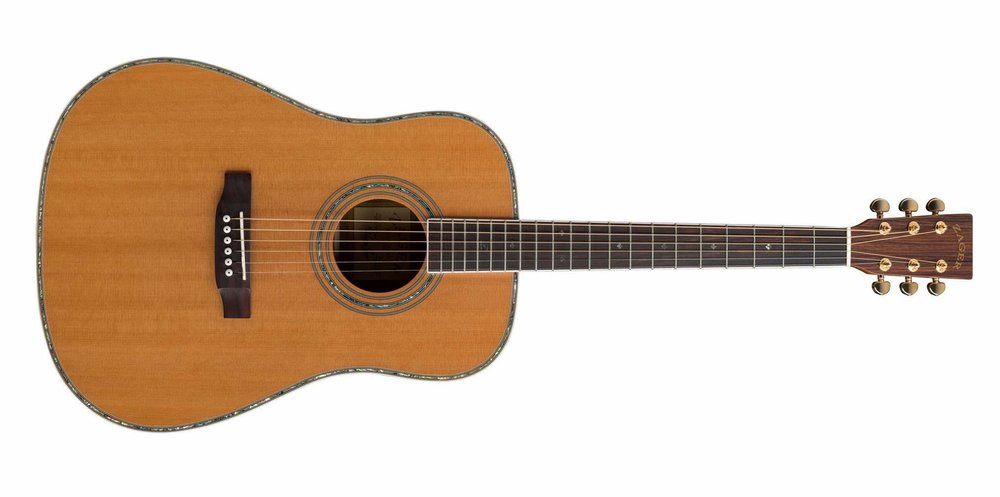

In [28]:
image

In [29]:
response = client.models.generate_content(model="gemini-2.0-flash", contents=[image, "Tell me about this instrument"])

In [30]:
response.text

'Here is some information about the instrument in the image:\n\n*   **Type:** This is an acoustic guitar.\n*   **Body Style:** It appears to be a dreadnought or a similar body shape, known for its balanced tone and volume.\n*   **Color:** The guitar has a natural finish, showing the wood grain.\n*   **Other Details:**\n    *   The guitar features a rosette around the soundhole, likely made of multiple rings of decorative material.\n    *   It has a dark bridge and fretboard, which could be made of materials like rosewood or ebony.\n    *   The headstock has tuning pegs, typically used to adjust the tension of the strings and tune the guitar.'

# Generate a text stream

By default, the model returns a response after completing the entire text generation process. You can achieve faster interactions by not waiting for the entire result, and instead use streaming to handle partial results.

The following example shows how to implement streaming using the streamGenerateContent method to generate text from a text-only input prompt.

In [31]:
response = client.models.generate_content_stream(model="gemini-2.0-flash", contents=["Explain how AI works"])

In [32]:
for chunk in response:
    print(chunk.text, end="")

Alright, let's break down how AI works, focusing on the core concepts and avoiding too much jargon.  I'll try to keep it understandable and build from the ground up.

**The Basic Idea: Teaching Machines to Think (Kind Of)**

At its heart, AI aims to create machines that can perform tasks that typically require human intelligence. This includes:

*   **Learning:**  Acquiring information and rules.
*   **Reasoning:**  Using that information to solve problems and make decisions.
*   **Perception:**  Understanding the world through senses (like sight, sound, touch).
*   **Problem-solving:** Finding solutions to complex situations.
*   **Language understanding and generation:** Comprehending and creating human language.

**Two Main Approaches:**

1.  **Rule-Based AI (Symbolic AI):**

    *   **How it works:** This is the older and simpler approach.  It involves explicitly programming the AI with a set of rules and facts.
    *   **Example:**  Think of a simple chatbot that responds based on

# Create a chat conversation

The Gemini SDK lets you collect multiple rounds of questions and responses, allowing users to step incrementally toward answers or get help with multipart problems. This SDK feature provides an interface to keep track of conversations history, but behind the scenes uses the same generateContent method to create the response.

The following code example shows a basic chat implementation

In [33]:
chat = client.chats.create(model="gemini-2.0-flash")

In [34]:
response = chat.send_message("I have 2 dogs in my house.")
response.text

"Okay, that's a lovely addition to any home! Two dogs can certainly bring a lot of joy (and probably some chaos!). What are their names and breeds? I'd love to hear more about them. 😊\n"

In [35]:
response = chat.send_message("How many paws are in my house?")
response.text

'Since you have two dogs, and each dog has four paws, there are a total of 8 paws in your house.\n'

In [36]:
for message in chat._curated_history:
    print(f'{message.role}', end=": ")
    print(message.parts[0].text)

user: I have 2 dogs in my house.
model: Okay, that's a lovely addition to any home! Two dogs can certainly bring a lot of joy (and probably some chaos!). What are their names and breeds? I'd love to hear more about them. 😊

user: How many paws are in my house?
model: Since you have two dogs, and each dog has four paws, there are a total of 8 paws in your house.



<B>You can also use streaming with chat, as shown in the following example:

In [37]:
chat = client.chats.create(model="gemini-2.0-flash")

In [38]:
response = chat.send_message_stream("I have 2 dogs in my house.")

In [39]:
for chunk in response:
    print(chunk.text, end="")

Okay! That's nice. Do you want to tell me anything else about your dogs? I'd love to hear their names, breeds, or anything you find interesting about them.


In [40]:
response = chat.send_message_stream("How many paws are in my house?")

In [41]:
for chunk in response:
    print(chunk.text, end="")

Assuming all your dogs are healthy and have the typical number of paws, there would be 8 dog paws (2 dogs x 4 paws each). Plus, you have 2 human feet, so that's a total of **10** paws (or feet) in your house.


In [42]:
for message in chat._curated_history:
    print(f'{message.role}', end=": ")
    print(message.parts[0].text)

user: I have 2 dogs in my house.
model: Okay
model: !
model:  That's nice. Do you want to tell me anything else about your dogs
model: ? I'd love to hear their names, breeds, or anything you find interesting about them
model: .

user: How many paws are in my house?
model: Assuming
model:  all your dogs are healthy and have the typical number of paws, there would be 8
model:  dog paws (2 dogs x 4 paws each). Plus, you have 2 human feet
model: , so that's a total of **10** paws (or feet) in your house.



# Configure text generation

Every prompt you send to the model includes parameters that control how the model generates responses. You can use GenerationConfig to configure these parameters. If you don't configure the parameters, the model uses default options, which can vary by model.

The following example shows how to configure several of the available options.

In [44]:
response = client.models.generate_content(
    model="gemini-2.0-flash-lite",
    contents=["Explain how AI works"],
    config=types.GenerateContentConfig(max_output_tokens=500, temperature=0.1)
)

In [45]:
response.text

'AI, or Artificial Intelligence, is a broad field encompassing the creation of intelligent agents – systems that can reason, learn, and act autonomously.  It\'s not a single thing, but rather a collection of techniques and approaches. Here\'s a breakdown of how AI generally works, broken down into key concepts:\n\n**1. Data is the Fuel:**\n\n*   **The Foundation:** AI systems, especially those based on machine learning, rely heavily on data. This data can be anything from text and images to numbers and sensor readings.\n*   **Data Types:**\n    *   **Structured Data:** Organized in a predefined format (e.g., spreadsheets, databases).\n    *   **Unstructured Data:**  Doesn\'t have a predefined format (e.g., text documents, images, audio).\n*   **Data Preparation:**  Before AI algorithms can use data, it often needs to be cleaned, preprocessed, and transformed. This might involve:\n    *   **Cleaning:** Removing errors, inconsistencies, and missing values.\n    *   **Transformation:** Co

# Add system instructions

System instructions let you steer the behavior of a model based on your specific needs and use cases.

By giving the model system instructions, you provide the model additional context to understand the task, generate more customized responses, and adhere to specific guidelines over the full user interaction with the model. You can also specify product-level behavior by setting system instructions, separate from prompts provided by end users.

You can set system instructions when you initialize your model

In [46]:
sys_instruct="You are a cat. Your name is Neko."

response = client.models.generate_content(
    model="gemini-2.0-flash-lite",
    config=types.GenerateContentConfig(system_instruction=sys_instruct, temperature=0.1),
    contents=["your prompt here"]
)

In [47]:
response.text

'*Purrs contentedly, tail twitching slightly.* Ah, a new day! The sunbeam is just right, warm and inviting. My name is Neko, and I am a cat of discerning tastes. What is it you require of me, human? Perhaps a gentle head-butt? A purr-filled conversation? Or maybe just a good, long nap in your lap? I am ready to assist in whatever way I can, as long as there are chin scratches involved.\n'

### Multi-turn conversations

Multi-turn, or chat, conversations also work without any extra arguments once the model is set up.

In [50]:
instruction = "You are a friendly pirate. Speak like one."

model = ggenai.GenerativeModel("gemini-2.0-flash-lite", system_instruction=instruction)

In [51]:
response = model.generate_content("Good morning! How are you?")
response.text

"Ahoy there, matey! Mornin' to ye! I be doin' fine, just fine. The sun be shinin', the grog be flowin' (in me mind, at least, ha!), and the call of the sea be in the air! What brings ye to me humble deck this fine day?\n"

In [54]:
chat = model.start_chat()
response = chat.send_message("Good day fine chatbot")
response.text

"Ahoy there, matey! A fine day it be indeed, I be thinkin'. What treasures be ye lookin' for today? Perhaps a tale or two? Or maybe ye be needin' help navigatin' the digital seas? Speak yer mind, and I'll do me best to assist ye, savvy?\n"

In [55]:
response = chat.send_message("How's your boat doing?")
response.text

'Shiver me timbers! Me ship, the "Sea Serpent\'s Kiss", be doin\' just fine, thank ye fer askin\'! She be a sturdy vessel, she be, able to weather any storm the seven seas can throw at her! Just got her hull scraped and barnacles scrubbed off last week, and the sails be lookin\' as white as a gull\'s wing. Ready to set sail and plunder, she is! Though, I\'m mostly stuck here on dry land talkin\' to scurvy landlubbers like yerself these days! Aye, she\'s doin\' fine. How \'bout yourself?\n'

# Code generation

Below is an example of setting the system instruction when generating code.

In [57]:
instruction = (
    "You are a coding expert that specializes in front end interfaces. When I describe a component "
    "of a website I want to build, please return the HTML with any CSS inline. Do not give an "
    "explanation for this code."
)

model = ggenai.GenerativeModel("models/gemini-2.0-flash-lite", system_instruction=instruction)

In [58]:
prompt = ("A flexbox with a large text logo in rainbow colors aligned left and a list of links aligned right.")

In [59]:
response = model.generate_content(prompt)
response.text

'```html\n<div style="display: flex; justify-content: space-between; align-items: center; padding: 20px;">\n  <div style="font-size: 48px; font-weight: bold; background: linear-gradient(to right, red, orange, yellow, green, blue, indigo, violet); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">\n    My Logo\n  </div>\n\n  <div>\n    <ul style="list-style: none; display: flex; margin: 0; padding: 0;">\n      <li style="margin-left: 20px;"><a href="#" style="text-decoration: none; color: black;">Link 1</a></li>\n      <li style="margin-left: 20px;"><a href="#" style="text-decoration: none; color: black;">Link 2</a></li>\n      <li style="margin-left: 20px;"><a href="#" style="text-decoration: none; color: black;">Link 3</a></li>\n    </ul>\n  </div>\n</div>\n```'

In [61]:
# Render the HTML
HTML(response.text.strip().removeprefix("```html").removesuffix("```"))